# Project: Pedestrian detection model

## a little blabla...

Even before the pandemic, the popularity of online retailing was destroying shopping malls and stores in general. Research showed that 96% of the decline in shopping mall revenue was due to Amazon alone. The pandemic has made those challenges even harder for retailers.

I believe that Data Science can play a little helper role in analyzing the customer traffic and stores can understand more about the factors that can impact the customer experience with a regression analysis.

In [26]:
from pytube import YouTube
import numpy as np
import pandas as pd
import time

#image/video/webcam processing library
import cv2
import os
from imutils.object_detection import non_max_suppression
import imutils

from matplotlib import pyplot as plt

In [41]:
#Kabukicho Live Channel from Youtube
#https://www.youtube.com/channel/UCCLnJzwda_Kcdkok3et7n0A/videos

df = pd.read_csv('./cam.csv')
df.head()

,Date,Link
0,2022-08-1『0:00～,https://www.youtube.com/watch?v=NG5PRlh3aGs
1,2022-08-1『3:00～,https://www.youtube.com/watch?v=RBHLcMjQGNM
2,2022-08-1『6:00～』,https://www.youtube.com/watch?v=0uPR9E3_pKE
3,2022-08-1『9:00～』,https://www.youtube.com/watch?v=KZO1kklsWkQ
4,2022-08-1『12:00～』,https://www.youtube.com/watch?v=VUt8kyioTbM


In [11]:
SAVE_PATH = "./data"

In [12]:
#links of the Youtube videos to download in bulk 
df['Link'] = df['Link'].astype(str)
links = df['Link']
links

0     https://www.youtube.com/watch?v=NG5PRlh3aGs
1     https://www.youtube.com/watch?v=RBHLcMjQGNM
2     https://www.youtube.com/watch?v=0uPR9E3_pKE
3     https://www.youtube.com/watch?v=KZO1kklsWkQ
4     https://www.youtube.com/watch?v=VUt8kyioTbM
5     https://www.youtube.com/watch?v=tVLnUNJhXBU
6     https://www.youtube.com/watch?v=LkYinMYoQ6Y
7     https://www.youtube.com/watch?v=3kCqX1NCdTE
8     https://www.youtube.com/watch?v=lxYvJjdkQPs
9     https://www.youtube.com/watch?v=KZmNwS7z0Qk
10    https://www.youtube.com/watch?v=I-wlx6KE08U
11    https://www.youtube.com/watch?v=X4dtllpFW3s
12    https://www.youtube.com/watch?v=WW8UEL7ToIM
13    https://www.youtube.com/watch?v=s7vNyRAqFXg
14    https://www.youtube.com/watch?v=C5cBrN7fXf4
15    https://www.youtube.com/watch?v=wVHuwh5Nfnc
16    https://www.youtube.com/watch?v=qdoqadm8_2g
17    https://www.youtube.com/watch?v=VykzXoeuCjg
18    https://www.youtube.com/watch?v=xOETZJnkaso
19    https://www.youtube.com/watch?v=isX_Rc_1VK4


In [92]:
start_time = time.time()

for i in links:
    print(i)
    yt = YouTube(i)
    yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first().download('/Users/jennyma/Desktop/concordia-bootcamps')

    
print("--- %s seconds ---" % (time.time() - start_time))


https://www.youtube.com/watch?v=wHRP_71L3A4
--- 173.6956160068512 seconds ---


In [7]:
yt = YouTube('https://www.youtube.com/watch?v=fhFs-vd6030')
yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first().download('/Users/jennyma/Desktop/concordia-bootcamps')

'/Users/jennyma/Desktop/concordia-bootcamps/【 Archive 】2022-07-05『1200～』東京都 新宿 歌舞伎町 ライブ カメラ.mp4'

In [1]:
###Open a video

capture = cv2.VideoCapture('/Users/jennyma/Desktop/concordia-bootcamps/1.mp4')

while True:
    isTrue, frame = capture.read()
    if isTrue:
        cv2.imshow('Video', frame)
        
    if not isTrue:
        print('Cant read the video , Exit!')
        break
        
    if cv2.waitKey(20) & 0xFF==ord('d'):
        break

capture.release()
cv2.destroyAllWindows()

In [2]:
###Extract frames and scan through all frames to detect humans

#Empty df
df = pd.DataFrame(columns=['Time', 'Count'])

def detect(image, name):
    ## Using Sliding window concept
    rects, weights = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.03)
    
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    #non-max suppression function needs to be invoked
    #to avoid detection of the same object at multiple times and scales
    human = non_max_suppression(rects, probs=None, overlapThresh=0.65)
    person = 1


    for x, y, w, h in human:
        cv2.rectangle(image, (x, y), (w, h), (139, 34, 104), 2)
        cv2.rectangle(image, (x, y - 20), (w,y), (139, 34, 104), -1)
        cv2.putText(image, f'P{person}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        person += 1
    
    #append human count in dataframe
    df.loc[len(df)] = [name[73:88], person]

    cv2.putText(image, f'Total Persons : {person - 1}', (20, 450), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255, 255,255), 2)
    
    cv2.line(image, pt1=(500, 250),pt2=(1280, 250), color=(0xFF, 0, 0), thickness=5)
    
    cv2.imshow('output', image)
    return image



class Video:
    def __init__(self, pathIn):
        self.img = cv2.imread(pathIn)
        self.name = pathIn
        
    def extractImages(self, pathIn, pathOut):
        count = 0
        vidcap = cv2.VideoCapture(pathIn)

        if vidcap.isOpened():
            success,image = vidcap.read()
            success = True
            while success:
                #Extract frame every 1 minute
                vidcap.set(cv2.CAP_PROP_POS_MSEC,(count*60000))   
                success,image = vidcap.read()
                image = detect(image, self.name)
                print ('Read a new frame: ', success)
                cv2.imwrite( pathOut + "\\frame%d.jpg" % count, image)     # save frame as JPEG file
                count = count + 1

                
 


In [3]:
directory = '/Users/jennyma/Desktop/concordia-bootcamps/Final_Project/data'

array = []

# iterate over files in
# that directory

#Create a HOGDescriptor object
#Initialize directional gradient histogram descriptor
# Description: Detect pedestrians in an image using the 
# Histogram of Oriented Gradients (HOG) method
hog = cv2.HOGDescriptor()

# Initialize the People Detector
#Support vector machine is set up to make it a pre trained pedestrian detector
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
            
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        if f.endswith('.mp4'):
            array.append(f)



In [59]:
i = '/Users/jennyma/Desktop/concordia-bootcamps/Final_Project/data/【 Archive 】2022-08-07『2100～』東京都 新宿 歌舞伎町 ライブ カメラ.mp4'
x = Video(i)
x.extractImages(i,'/Users/jennyma/Desktop/concordia-bootcamps/')

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/core/src/matrix.cpp:246: error: (-215:Assertion failed) s >= 0 in function 'setSize'


In [61]:
#convert df to csv
df.to_csv('/Users/jennyma/Desktop/concordia-bootcamps/Final_Project/df1.csv', sep='\t',index=False)



In [27]:
###Start running from here to read the df
df = pd.read_csv('/Users/jennyma/Desktop/concordia-bootcamps/Final_Project/df1.csv',sep='\t')


In [29]:
#Prepare DB
df['Day'] = df["Time"].map(lambda x: "Monday" if "2022-08-1" in x else "Tuesday" if "2022-08-02" in x else "Wednesday" if "2022-08-03" in x else "Thursday" if "2022-08-04" in x else "Friday" if "2022-08-05" in x else "Saturday" if "2022-08-06" in x else "Sunday" if "2022-08-07" in x else "")

df['DayID'] = df["Time"].map(lambda x: "1" if "2022-08-1" in x else "2" if "2022-08-02" in x else "3" if "2022-08-03" in x else "4" if "2022-08-04" in x else "5" if "2022-08-05" in x else "6" if "2022-08-06" in x else "7" if "2022-08-07" in x else "")

#https://www.volcanodiscovery.com/earthquakes/today.html
df['Earthquake'] = df["Time"].map(lambda x: "2.5" if "2022-08-1" in x else "2.6" if "2022-08-02" in x else "2.5" if "2022-08-03" in x else "2.9" if "2022-08-04" in x else "3.6" if "2022-08-05" in x else "5" if "2022-08-06" in x else "2.5" if "2022-08-07" in x else "")

#https://world-weather.info/forecast/japan/tokyo/august-2022/
df['Temperature'] = df["Time"].map(lambda x: 91 if "2022-08-1" in x else 91 if "2022-08-02" in x else 91 if "2022-08-03" in x else 81 if "2022-08-04" in x else 81 if "2022-08-05" in x else 82 if "2022-08-06" in x else 86 if "2022-08-07" in x else "")
df['Rain'] = df["Time"].map(lambda x: "1" if "2022-08-04" in x else "0")

#https://tokyofilmgoer.com/cinema_tips/
df['CinemaSpecial'] = df["Time"].map(lambda x: "1" if "2022-08-1" in x else "0")

#https://twitter.com/KiwamiBankara/status/1555214676476461056
df['BeerSpecial'] = df["Time"].map(lambda x: 1 if "2022-08-04" in x else 1 if "2022-08-05" in x else 1 if "2022-08-06" in x else 1 if "2022-08-07" in x else 0)

df['Weekend'] = df["Time"].map(lambda x: 1 if "2022-08-05" in x else 1 if "2022-08-06" in x else 1 if "2022-08-07" in x else 0)

#get_dummies
df['Monday'] = df["Time"].map(lambda x: 1 if "2022-08-1" in x else 0)
df['Tuesday'] = df["Time"].map(lambda x: 1 if "2022-08-02" in x else 0)
df['Wednesday'] = df["Time"].map(lambda x: 1 if "2022-08-03" in x else 0)
df['Thursday'] = df["Time"].map(lambda x: 1 if "2022-08-04" in x else 0)
df['Friday'] = df["Time"].map(lambda x: 1 if "2022-08-05" in x else 0)
df['Saturday'] = df["Time"].map(lambda x: 1 if "2022-08-06" in x else 0)
df['Sunday'] = df["Time"].map(lambda x: 1 if "2022-08-07" in x else 0)
df

,Time,Count,Day,DayID,Earthquake,Temperature,Rain,CinemaSpecial,BeerSpecial,Weekend,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2022-08-1『000～』,17,Monday,1,2.5,91,0,1,0,0,1,0,0,0,0,0,0
1,2022-08-1『000～』,15,Monday,1,2.5,91,0,1,0,0,1,0,0,0,0,0,0
2,2022-08-1『000～』,13,Monday,1,2.5,91,0,1,0,0,1,0,0,0,0,0,0
3,2022-08-1『000～』,12,Monday,1,2.5,91,0,1,0,0,1,0,0,0,0,0,0
4,2022-08-1『000～』,15,Monday,1,2.5,91,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,2022-08-07『2100,16,Sunday,7,2.5,86,0,0,1,1,0,0,0,0,0,0,1
10076,2022-08-07『2100,16,Sunday,7,2.5,86,0,0,1,1,0,0,0,0,0,0,1
10077,2022-08-07『2100,12,Sunday,7,2.5,86,0,0,1,1,0,0,0,0,0,0,1
10078,2022-08-07『2100,16,Sunday,7,2.5,86,0,0,1,1,0,0,0,0,0,0,1


In [5]:
#df['Count'].mean()

13.982043650793651

In [65]:
df['Hour'] = df["Time"].map(lambda x: "000" if "000" in x else "0300" if "300" in x else "0600" if "600" in x else "0900" if "900" in x else "1200" if "1200" in x else "1500" if "1500" in x else "1800" if "1800" in x else "2100" if "2100" in x else "")

df['Lunch'] = df["Time"].map(lambda x: 1 if "1200" in x else 0)
df['Dinner'] = df["Time"].map(lambda x: 1 if "1800" in x else 0)
df['LateNight'] = df["Time"].map(lambda x: 1 if "2100" in x else 1 if "000" in x else 0)
df['Traffic'] = df["Count"].map(lambda x: 1 if x>13 else 0)
df['TempOver30'] = df["Temperature"].map(lambda x:1 if x > 85 else 0)

df

,Time,Count,Day,DayID,Earthquake,Temperature,Rain,CinemaSpecial,BeerSpecial,Weekend,...,Thursday,Friday,Saturday,Sunday,Hour,Lunch,Dinner,LateNight,Traffic,TempOver30
0,2022-08-1『000～』,17.0,Monday,1.0,2.5,91.0,0.0,1.0,0.0,0,...,0,0,0,0,000,0,0,1,1,1
1,2022-08-1『000～』,15.0,Monday,1.0,2.5,91.0,0.0,1.0,0.0,0,...,0,0,0,0,000,0,0,1,1,1
2,2022-08-1『000～』,13.0,Monday,1.0,2.5,91.0,0.0,1.0,0.0,0,...,0,0,0,0,000,0,0,1,0,1
3,2022-08-1『000～』,12.0,Monday,1.0,2.5,91.0,0.0,1.0,0.0,0,...,0,0,0,0,000,0,0,1,0,1
4,2022-08-1『000～』,15.0,Monday,1.0,2.5,91.0,0.0,1.0,0.0,0,...,0,0,0,0,000,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,2022-08-07『2100,16.0,Sunday,7.0,2.5,86.0,0.0,0.0,1.0,1,...,0,0,0,1,2100,0,0,1,1,1
10076,2022-08-07『2100,16.0,Sunday,7.0,2.5,86.0,0.0,0.0,1.0,1,...,0,0,0,1,2100,0,0,1,1,1
10077,2022-08-07『2100,12.0,Sunday,7.0,2.5,86.0,0.0,0.0,1.0,1,...,0,0,0,1,2100,0,0,1,0,1
10078,2022-08-07『2100,16.0,Sunday,7.0,2.5,86.0,0.0,0.0,1.0,1,...,0,0,0,1,2100,0,0,1,1,1


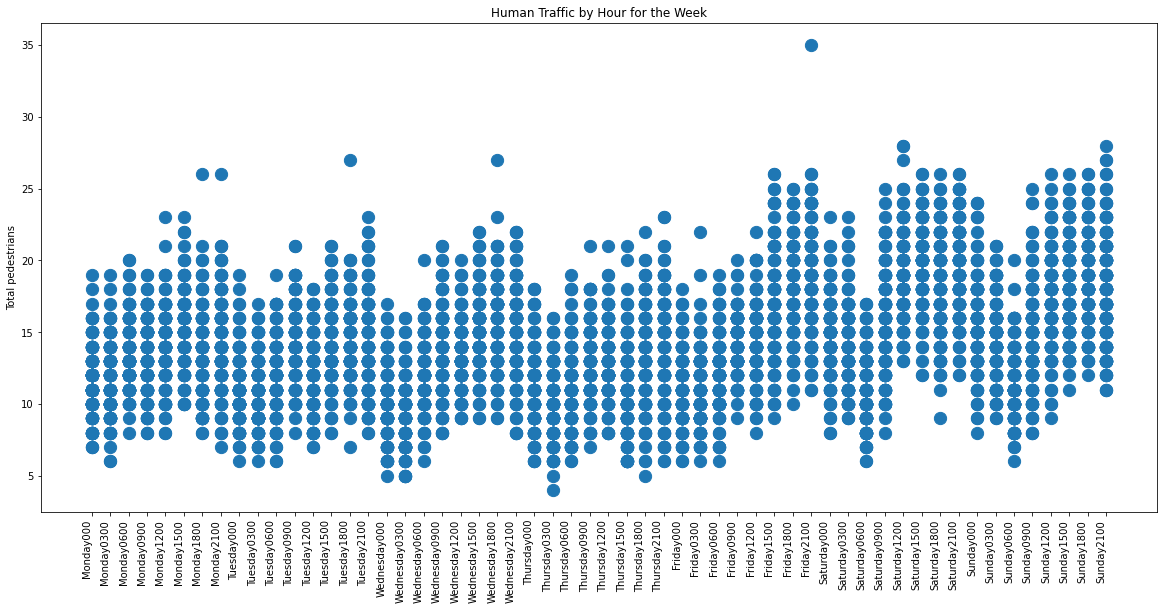

In [66]:
###Data Visualization

#sort to have xlabel in order
df = df.sort_values(by=['DayID', 'Hour'])

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(df['Day']+df['Hour'], df['Count'], s=150)
ax.set_title('Human Traffic by Hour for the Week')
ax.set_ylabel('Total pedestrians')
fig.autofmt_xdate(rotation=90)

#Busy traffic on Friday, Saturday and Sunday 


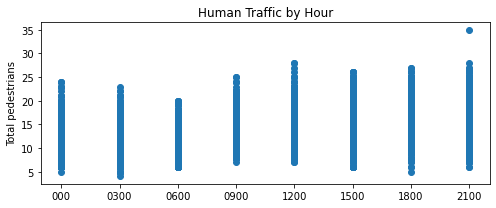

In [67]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.scatter(df['Hour'], df['Count'])
ax.set_title('Human Traffic by Hour')
ax.set_ylabel('Total pedestrians')

fig.tight_layout()

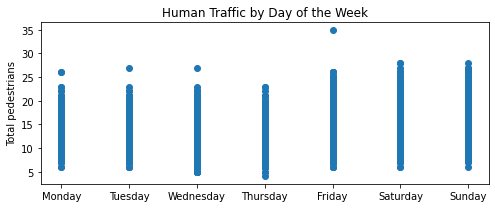

In [68]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.scatter(df['Day'], df['Count'])
ax.set_title('Human Traffic by Day of the Week')
ax.set_ylabel('Total pedestrians')

fig.tight_layout()

In [69]:
#Convert df format
import statsmodels.api as sm

df['Count'] = df['Count'].astype(float)
df['Hour'] = df['Hour'].astype(float)
df['DayID'] = df['DayID'].astype(float)
df['Earthquake'] = df['Earthquake'].astype(float)
df['Temperature'] = df['Temperature'].astype(float)
df['Rain'] = df['Rain'].astype(float)
df['CinemaSpecial'] = df['CinemaSpecial'].astype(float)
df['BeerSpecial'] = df['BeerSpecial'].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 10079
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           10080 non-null  object 
 1   Count          10080 non-null  float64
 2   Day            10080 non-null  object 
 3   DayID          10080 non-null  float64
 4   Earthquake     10080 non-null  float64
 5   Temperature    10080 non-null  float64
 6   Rain           10080 non-null  float64
 7   CinemaSpecial  10080 non-null  float64
 8   BeerSpecial    10080 non-null  float64
 9   Weekend        10080 non-null  int64  
 10  Monday         10080 non-null  int64  
 11  Tuesday        10080 non-null  int64  
 12  Wednesday      10080 non-null  int64  
 13  Thursday       10080 non-null  int64  
 14  Friday         10080 non-null  int64  
 15  Saturday       10080 non-null  int64  
 16  Sunday         10080 non-null  int64  
 17  Hour           10080 non-null  float64
 18  Lunch 

In [70]:
##Regression Analysis


X = df.drop(['Time','Count','Day','DayID','Hour','Traffic'],axis=1)
Y = df["Traffic"]

est = sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Traffic   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     191.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:57:27   Log-Likelihood:                -6514.9
No. Observations:               10080   AIC:                         1.305e+04
Df Residuals:                   10070   BIC:                         1.312e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Earthquake        0.0555      0.004     12.809      0.000       0.047       0.064
Temperature       0.0017      0.000     10.198      0.000       0.001       0.002
Rain             -0.0721      0.004    -16.047      0.000      -0.081      -0.063
CinemaSpecial     0.0128      0.006      2.169      0.030       0.001       0.024
BeerSpecial       0.0624      0.004     14.053      0.000       0.054       0.071
Weekend           0.1345      0.005     29.515      0.000       0.126       0.143
Monday            0.0128      0.006      2.169      0.030       0.001       0.024
Tuesday          -0.0647      0.009     -6.930      0.000      -0.083      -0.046
Wednesday        -0.0112      0.009     -1.204      0.229      -0.030       0.007
Thursday         -0.0721      0.004    -16.047      0.000      -0.081      -0.063
Friday           -0.0536      0.009     -5.873      0.000      -0.071      -0.036
Saturday          0.0607      0.005     12.129      0.000       0.051       0.071
Sunday            0.1273      0.006     21.447      0.000       0.116       0.139
Lunch             0.1659      0.015     11.398      0.000       0.137       0.194
Dinner            0.2770      0.015     19.033      0.000       0.248       0.306
LateNight         0.0873      0.011      7.745      0.000       0.065       0.109
TempOver30        0.0642      0.004     15.260      0.000       0.056       0.072
==============================================================================
Omnibus:                    73646.995   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.795
Skew:                           0.040   Prob(JB):                    3.32e-192
Kurtosis:                       1.553   Cond. No.                     1.06e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.65e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
#drop CinemaSpecial
X = df.drop(['Time','Count','Day','DayID','Hour','Traffic','Wednesday'],axis=1)
Y = df["Traffic"]

est = sm.OLS(Y,X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Traffic   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     191.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:57:37   Log-Likelihood:                -6514.9
No. Observations:               10080   AIC:                         1.305e+04
Df Residuals:                   10070   BIC:                         1.312e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Earthquake        0.0565      0.004     12.914      0.000       0.048       0.065
Temperature       0.0015      0.000      7.506      0.000       0.001       0.002
Rain             -0.0702      0.005    -14.256      0.000      -0.080      -0.061
CinemaSpecial     0.0184      0.009      2.138      0.033       0.002       0.035
BeerSpecial       0.0670      0.006     10.318      0.000       0.054       0.080
Weekend           0.1372      0.005     25.855      0.000       0.127       0.148
Monday            0.0184      0.009      2.138      0.033       0.002       0.035
Tuesday          -0.0536      0.017     -3.128      0.002      -0.087      -0.020
Thursday         -0.0702      0.005    -14.256      0.000      -0.080      -0.061
Friday           -0.0532      0.009     -5.831      0.000      -0.071      -0.035
Saturday          0.0599      0.005     11.697      0.000       0.050       0.070
Sunday            0.1306      0.007     18.865      0.000       0.117       0.144
Lunch             0.1659      0.015     11.398      0.000       0.137       0.194
Dinner            0.2770      0.015     19.033      0.000       0.248       0.306
LateNight         0.0873      0.011      7.745      0.000       0.065       0.109
TempOver30        0.0631      0.004     14.743      0.000       0.055       0.071
==============================================================================
Omnibus:                    73646.995   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.795
Skew:                           0.040   Prob(JB):                    3.32e-192
Kurtosis:                       1.553   Cond. No.                     1.22e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.04e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)
preds = log_model.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       997
           1       0.70      0.63      0.66      1019

    accuracy                           0.68      2016
   macro avg       0.68      0.68      0.67      2016
weighted avg       0.68      0.68      0.67      2016



In [85]:
# Saving our model 
import pickle

file_name = 'human_detection_model'

with open(file_name, 'wb') as file:
    pickle.dump(log_model,file)

In [86]:
example1 = [2.5,0,0,0,0,1,0,1,0,0,0,0,0,0,0] #low traffic

example2 = [5,0,0,0,1,0,1,0,0,0,0,0,1,0,1] #high traffic



